# 1.0 Forecasting Boxplot

## 1.1 Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
'''
the observation data is the date of the target date of the observation, the columns is the economist who made the forecasts, the "As of" column on the left of each economist is the corresponding date such economist made the forecast.
'''

#CPI contains the data from CPI CHNG from bloomberg terminal, CPI index change
CPI_CHNG = pd.read_excel("CPI CHNG.xlsx")
CPI_CHNG['Observation Date'] = pd.to_datetime(CPI_CHNG['Observation Date'], format='%m/%d/%Y')
CPI_CHNG = CPI_CHNG.set_index('Observation Date')

#GDP is the GDP CQOQ from bloomberg terminal, Gross Domesitc Product, Constant Quarter-On-Quarter
GDP_CQOQ = pd.read_excel("GDP CQOQ.xlsx")
GDP_CQOQ['Observation Date'] = pd.to_datetime(GDP_CQOQ['Observation Date'], format='%m/%d/%Y')
GDP_CQOQ = GDP_CQOQ.set_index('Observation Date')
GDP_CQOQ = GDP_CQOQ.replace('--', np.nan)

#EMP is USURTOT, U-3 US Unemployment Rate Total in Labor Force Seasonally Adjusted
USURTOT = pd.read_excel("USURTOT.xlsx")
USURTOT['Observation Date'] = pd.to_datetime(USURTOT['Observation Date'], format='%m/%d/%Y')
USURTOT = USURTOT.set_index('Observation Date')

In [3]:
#To plot the boxplot, we would need to drop the "As of" columns from the dataset, contains the date of the corresponding forecast made by the economist, this will affect as same number columns as the number of the economist contains
#"Firm" column from the dataset does not contains any informaiton
#"Release Date" is one column shows the date that corresponding data point is public

CPI = CPI_CHNG.copy()
CPI_to_drop = CPI.columns[CPI.columns.str.contains('As of')]
CPI = CPI.drop(CPI_to_drop, axis=1)
CPI = CPI.drop('Firm', axis= 1)
CPI = CPI.drop('Release Date', axis= 1)

#Release date row is not removed for validating the spliting result from the next cell
GDP = GDP_CQOQ.copy()
GDP_to_drop = GDP.columns[GDP.columns.str.contains('As of')]
GDP = GDP.drop(GDP_to_drop, axis=1)
GDP = GDP.drop('Firm', axis= 1)

UEMP = USURTOT.copy()
UEMP_to_drop = UEMP.columns[UEMP.columns.str.contains('As of')]
UEMP = UEMP.drop(UEMP_to_drop, axis=1)
UEMP = UEMP.drop('Firm', axis= 1)
UEMP = UEMP.drop('Release Date', axis= 1)

In [4]:
#GDP data treatment, GDP CQOQ has three release, the first release is a month after the target observation date, second and final release each are a two month and three month after. We will be spliting the GDP data into three dataset which includes the first, second, and final release of GDP data and corresponding forecast.

GDP1 = GDP.iloc[::3]  # Every 3rd row starting from 0
GDP2 = GDP.iloc[1::3]  # Every 3rd row starting from 1
GDP3 = GDP.iloc[2::3]  # Every 3rd row starting from 2

## 1.2 Data Exploration

## 1.3 Boxplot

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def create_forecast_plot(df: pd.DataFrame, year: int, name: str):
    """
    Function to create a forecast plot for a given DataFrame, year and title.

    Parameters:
    df (pd.DataFrame): The DataFrame with the data to plot. It should have a DateTime index and a column named 'Actual'.
    year (int): The year for which to create the plot.
    name (str): The name to put in the plot's title.

    """

    # Filter DataFrame to only include rows for the specified year
    df_year = df[df.index.year == year]

    # Print shape of DataFrame for debugging purposes
    print(df_year.shape)

    # Get forecast columns (all columns except 'Actual')
    forecast_cols = df_year.columns[1:]

    # Create a figure and axis with a specific size
    fig, ax = plt.subplots(figsize=(16, 12))

    # Increase the space between the plot and the title
    plt.subplots_adjust(top=0.85)

    # Create boxplot of forecast columns
    # The 'whis' parameter specifies that the whiskers should go from the minimum to the maximum of the data
    # The properties parameters (capprops, boxprops, medianprops, whiskerprops) specify the color and line width of different elements of the boxplot
    bp = df_year[forecast_cols].T.boxplot(ax=ax, positions=range(len(df_year.index)),
                                           whis=[0, 100],
                                           capprops = {'color': '#496C88', 'linewidth': 2},
                                           boxprops = {'color': '#496C88', 'linewidth': 2},
                                           medianprops = {'color': '#E88482', 'linewidth': 2},
                                           whiskerprops = {'color': '#A5B6C5', 'linewidth': 2})

    # Add text to the plot indicating the number of observations for each date
    for i, date in enumerate(df_year.index):
        num_observations = df_year.loc[date, forecast_cols].count()
        ax.text(i, ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.01,
                str(num_observations), ha='center', color='#496C88', fontsize = 'large',
                fontweight = 'bold')

    # Increase line width of the boxes in the boxplot
    for box in bp.artists:
        box.set_linewidth(2.5)

    # Plot actual values as red dots
    ax.scatter(x=range(len(df_year.index)), y=df_year['Actual'], color='#FEB2B4', s=100)

    # Find the months where the actual value was outside the range of predictions
    outside_range = (df_year['Actual'] < df_year[forecast_cols].min(axis=1)) | (df_year['Actual'] > df_year[forecast_cols].max(axis=1))

    # Plot these months with a different marker
    ax.scatter(x=np.where(outside_range)[0], y=df_year['Actual'][outside_range], color='BLUE',
               marker='x', linewidths=2.5, s= 50)

    # Set the labels and title of the plot
    ax.set_xlabel('Date',fontsize = 'xx-large')
    ax.set_ylabel('Forecast',fontsize = 'xx-large')
    ax.set_title(f'Boxplot for {name} Forecasting - {year}',fontsize = 'xx-large')

    # Set x-tick labels to be dates, formatted as 'YYYY-MM-DD'
    ax.set_xticklabels(df_year.index.strftime('%Y-%m-%d'), fontsize = 'large')

    # Set the line width of the plot's spines
    for spine in ax.spines.values():
        spine.set_linewidth(1)

    # Rotate x-tick labels 45 degrees for better visualization
    plt.xticks(rotation=45)

    # Remove grid from plot
    plt.grid(False)

    # Show the plot
    plt.show()

(12, 324)


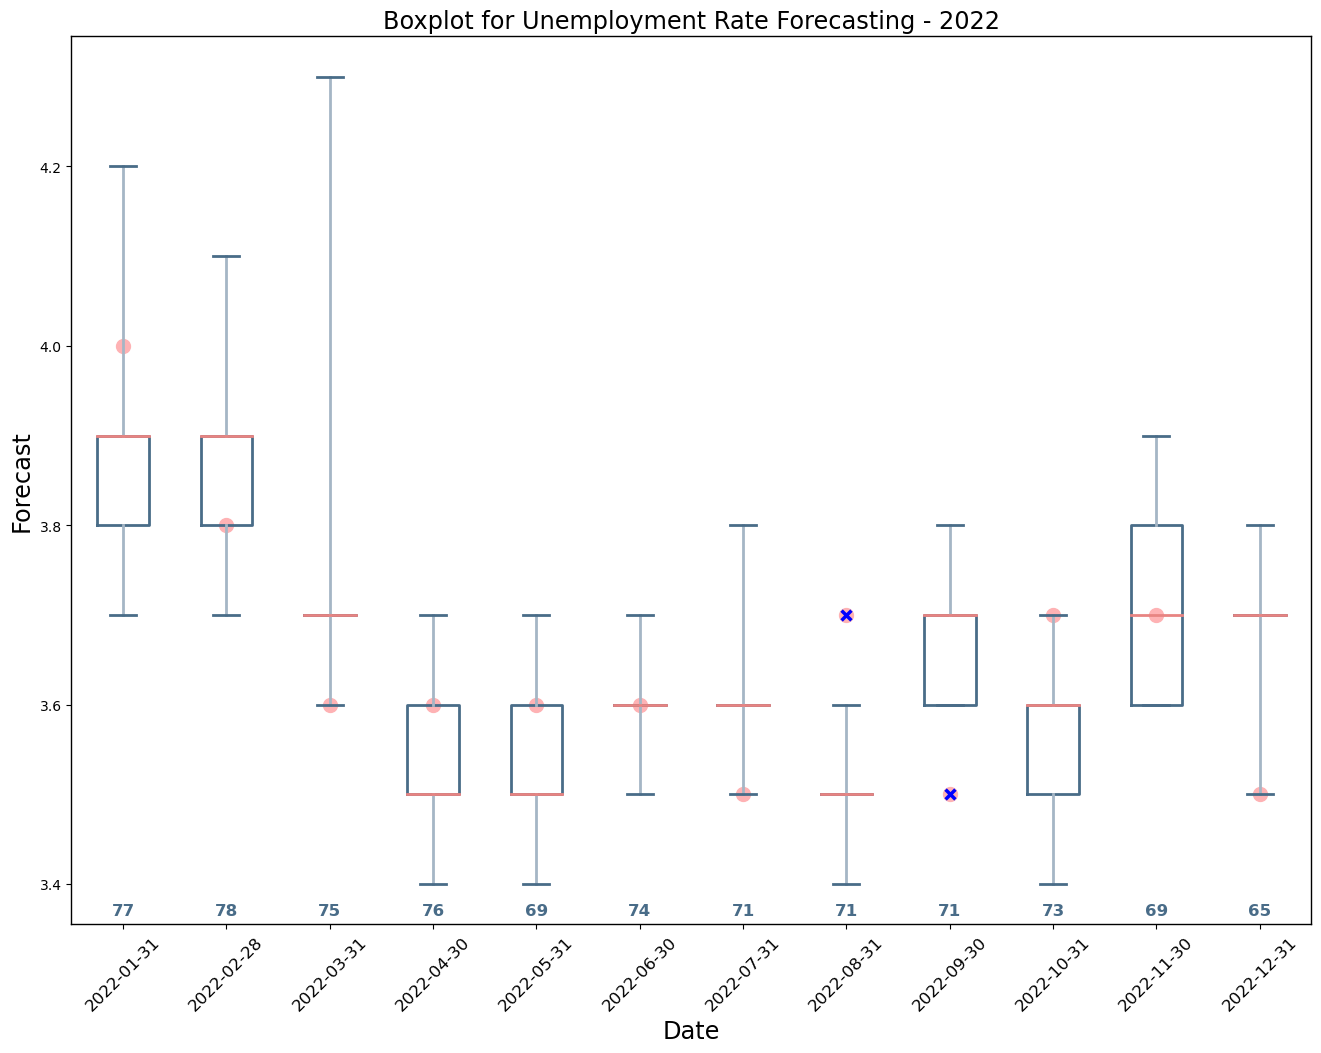

In [8]:
create_forecast_plot(UEMP, 2022, 'Unemployment Rate')
#whiskers are the min and max values, therefore, values fall outside the whiskers are consiered forecast failed.

(12, 313)


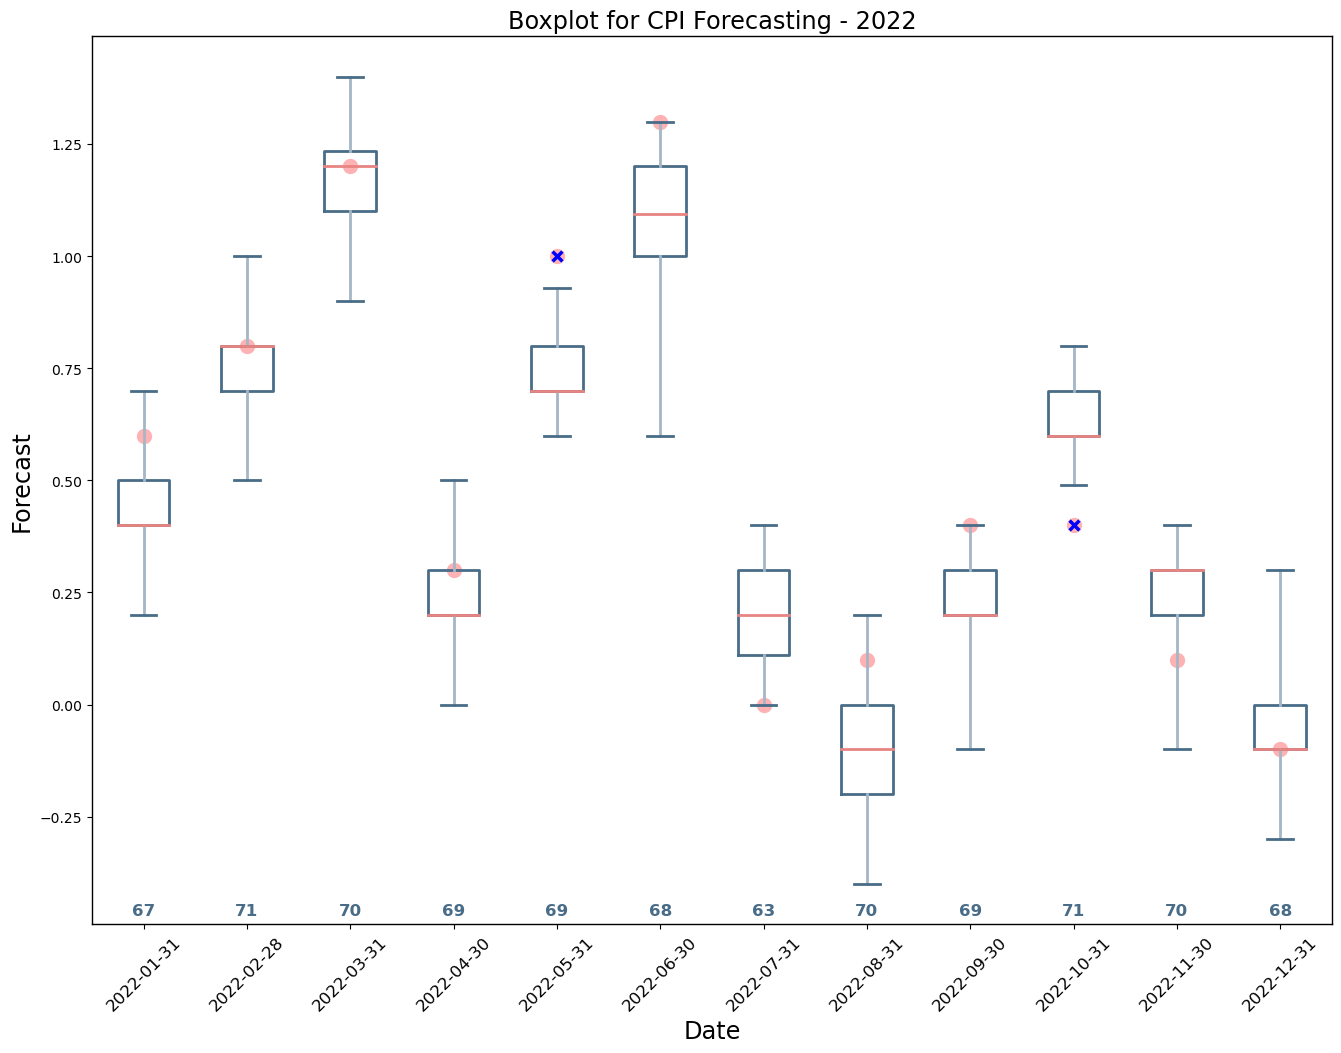

In [9]:
create_forecast_plot(CPI, 2022, 'CPI')

(4, 317)


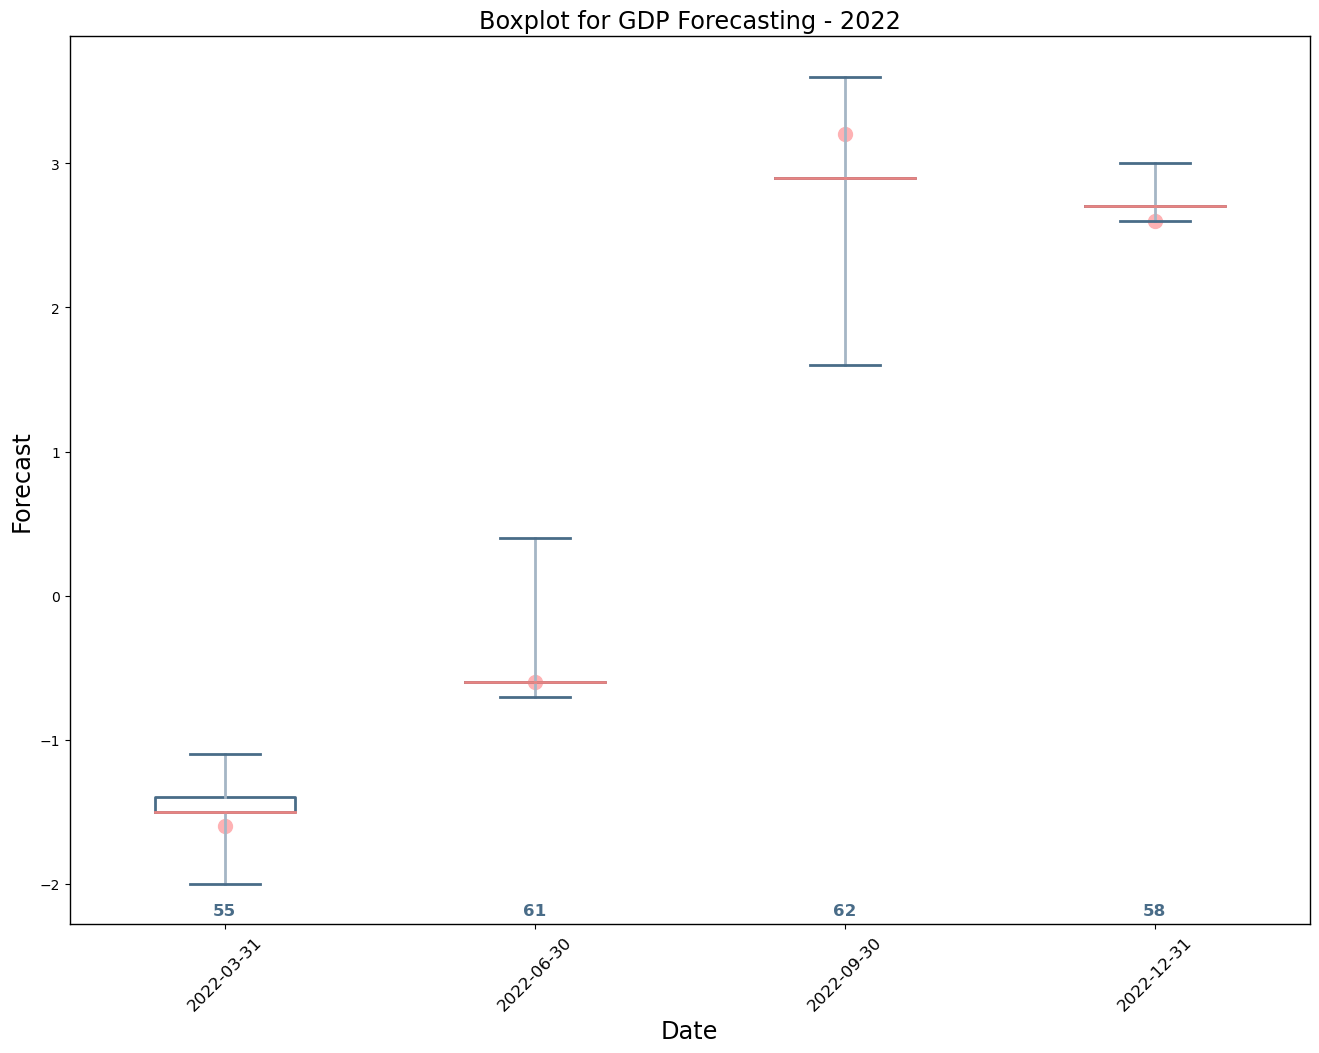

In [10]:
create_forecast_plot(GDP3, 2022, 'GDP')

# 2.0 Forecasting Accuracy vs. Time

In [11]:
#There are three releases for each of the quarter, however, 12/31/2018 misses the first release that were scheduled on Jan, 2019.
#For the ease of manipulating the data, I manually replicates another row of 3/28/2019 release on the Obsersation date of 12/31/2018
GDP_1 = GDP1.copy()
GDP_2 = GDP2.copy()
GDP_3 = GDP3.copy()

#We will first set all actual value as the final realease
GDP_label = GDP_3['Actual']


GDP_1 = GDP_1.drop(['Release Date','Actual'], axis= 1)
GDP_2 = GDP_2.drop(['Release Date','Actual'], axis= 1)
GDP_3 = GDP_3.drop(['Release Date','Actual'], axis= 1)

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def calculate_rmse_row_wise(actual_df, forecast_df):
    """
    Function to calculate the Root Mean Square Error (RMSE) for each row in the forecast_df against the actual values.
    This version of the function drops NaNs from the actual_df and corresponding forecasts before each calculation.

    Parameters:
    actual_df (pd.DataFrame): The DataFrame with the actual values.
    forecast_df (pd.DataFrame): The DataFrame with the forecasted values. Each row is treated as a separate forecast.

    Returns:
    list: A list of RMSEs, one for each row.
    """
    rmses = []
    for idx in actual_df.index:
        if pd.notna(actual_df.loc[idx]):
            actual_value = actual_df.loc[idx]
            forecast_values = forecast_df.loc[idx].dropna() # drop NaNs from forecasts
            if not forecast_values.empty: # only calculate RMSE if there are any forecasts left
                rmse = sqrt(mean_squared_error([actual_value]*len(forecast_values), forecast_values))
                rmses.append(rmse)

    result = np.mean(rmses)
    return result

# Usage:
# rmses = calculate_rmse_row_wise(actual_df, forecast_df)
# print(rmses)


In [13]:
GDP

,Release Date,Actual,3d Currency Management Limited,4CAST/Continuum Economics,ABN Amro Bank N.V.,ABN Amro Bank NV,AIB Capital Markets PLC,Acciones y Valores SA/Colombia,Action Economics LLC,Aletti Gestielle Sgr Spa,...,Union Investment Privatfonds GmbH.1,United Nations Development Programme,University of Maryland,University of North Carolina,Visa USA Inc,Wealthify Limited,Wells Fargo Bank NA,Westpac Banking Corp,Westpac Banking Corp.1,Wrightson ICAP LLC
Observation Date,,,,,,,,,,,,,,,,,,,,,
2000-03-31,2000-04-27,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.2
2000-03-31,2000-05-25,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2000-03-31,2000-06-29,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3
2000-06-30,2000-07-28,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2000-06-30,2000-08-25,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,2023-02-23,2.7,NaN,3.0,NaN,NaN,NaN,2.9,3.0,NaN,...,NaN,NaN,2.9,NaN,2.8,NaN,3.0,NaN,NaN,2.9
2022-12-31,2023-03-30,2.6,NaN,3.0,2.7,NaN,NaN,2.7,2.7,NaN,...,NaN,NaN,2.7,NaN,2.7,NaN,2.7,NaN,NaN,2.9
2023-03-31,2023-04-27,1.1,NaN,1.4,2.0,NaN,NaN,2.4,2.0,NaN,...,NaN,NaN,1.8,NaN,3.5,NaN,0.8,2.2,NaN,2.8


In [14]:
RMSE_1 = calculate_rmse_row_wise(GDP_label, GDP_1)
print("RMSE for the forecasts that were made on the FIRST release compare to final release")
print(RMSE_1)

RMSE_2 = calculate_rmse_row_wise(GDP_label, GDP_2)
print("\nRMSE for the forecasts that were made on the SECOND release compare to final release")
print(RMSE_2)

RMSE_3 = calculate_rmse_row_wise(GDP_label, GDP_3)
print("\nRMSE for the forecasts that were made on the FINAL release compare to final release")
print(RMSE_3)

RMSE for the forecasts that were made on the FIRST release compare to final release
1.045945911992145

RMSE for the forecasts that were made on the SECOND release compare to final release
0.4214724533682256

RMSE for the forecasts that were made on the FINAL release compare to final release
0.23245514271757256


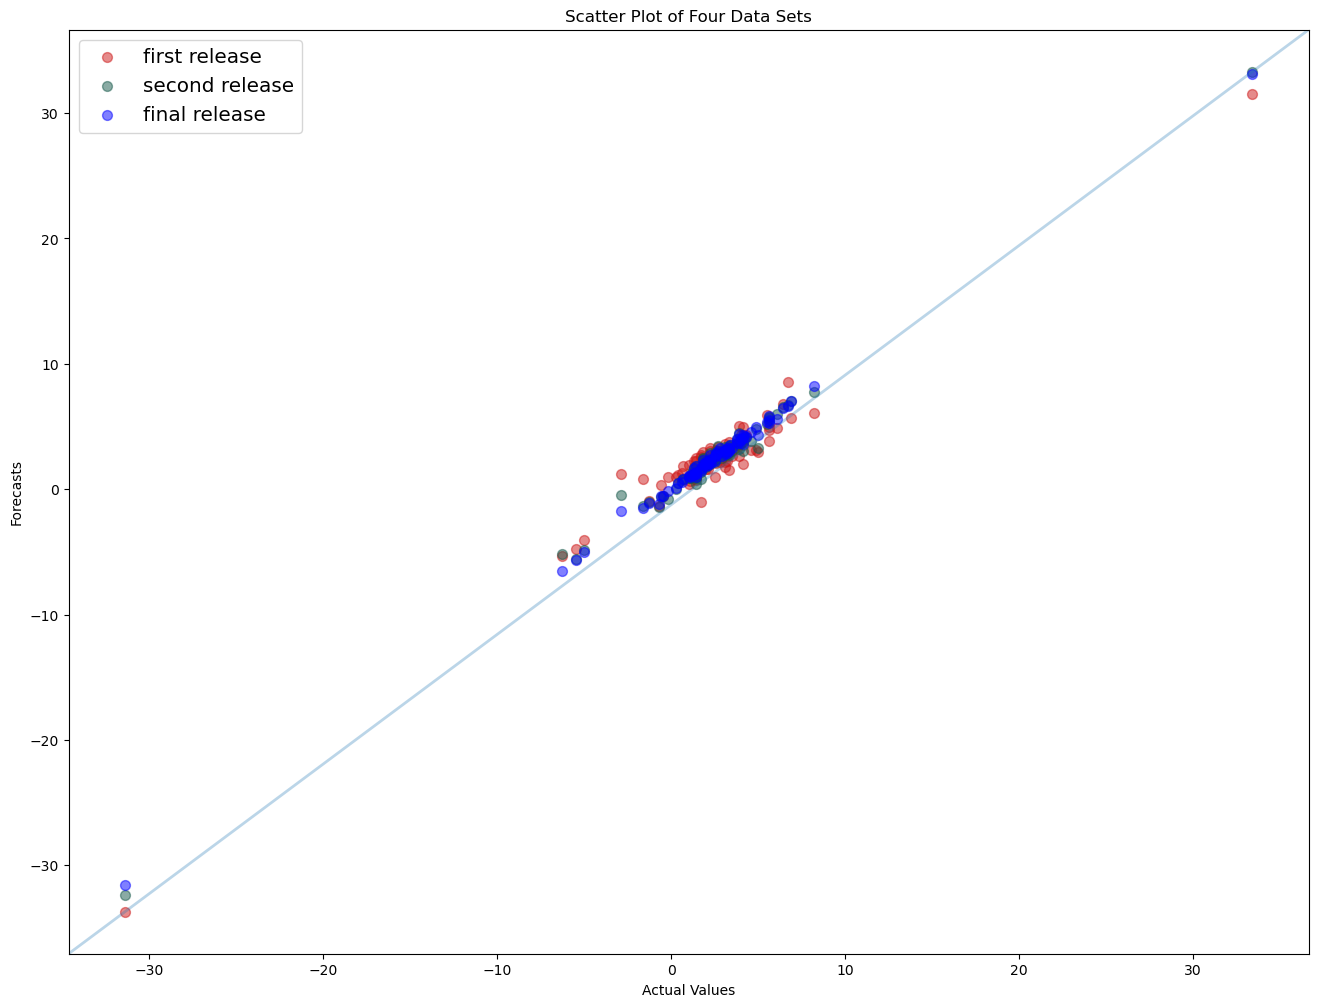

In [15]:
plt.figure(figsize=(16, 12))
plt.scatter(GDP_label, GDP_1.mean(axis= 1), color='#CD1818', label='first release', alpha= 0.5, s= 50) # plot data 1 in red
plt.scatter(GDP_label, GDP_2.mean(axis= 1), color='#17594A', label='second release', alpha= 0.5, s= 50) # plot data 2 in green
plt.scatter(GDP_label, GDP_3.mean(axis= 1), color='BLUE', label='final release', alpha= 0.5, s= 50) # plot data 3 in blue
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, alpha = 0.3, linewidth=2)


plt.xlabel('Actual Values')
plt.ylabel('Forecasts')
plt.title('Scatter Plot of Four Data Sets')
plt.legend(fontsize='x-large') # add a legend
plt.show()

In [16]:
GDP_1.mean(axis= 1)

Observation Date
2000-03-31    5.946154
2000-06-30    3.832432
2000-09-30         NaN
2000-12-31    1.941463
2001-03-31    1.188636
                ...   
2022-03-31    0.828986
2022-06-30    0.297297
2022-09-30    2.234286
2022-12-31    2.615068
2023-03-31    1.811429
Length: 93, dtype: float64